In [2]:
import numpy as np

In [3]:
def get_random_points(n):
    return np.random.uniform(-1, 1, [n, 2])

def get_random_line_vector():
    rp = np.random.uniform(-1, 1, (2, 2)) 
    slope = (rp[0, 1] - rp[1, 1]) / (rp[0, 0] - rp[1, 0])
    intercept = rp[0, 1] - rp[0, 0] * slope
    return [intercept, slope, 1]    

In [230]:
def get_labels(pi, fx_vector):
    labels = np.sign(np.dot(pi, fx_vector))
#     labels = pi[:, 2] + pi[:, 1] * fx_vector[1] + pi[:, 0] * fx_vector[0] >= 0
#     labels = np.where(labels, 1, -1)
    return labels

def get_plot_points_from_vector(vector):
    x = np.array([-2, 2])
    y = (- vector[1] * x - vector[0]) / vector[2]
    return (x, y)

In [231]:
import matplotlib.pyplot as plt
import time
from IPython import display

def update_plot(points, labels, fx_vector, gx_vector):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_ylim([-2,2])
    ax1.set_xlim([-2,2])

    x = points[:, 0]
    y = points[:, 1]
    ax1.scatter(x[labels==1], y[labels==1], s=30, c='b', marker='+')
    ax1.scatter(x[labels==-1],y[labels==-1], s=30, c='r', marker="_")

    gx_x, gx_y  = get_plot_points_from_vector(gx_vector)
    ax1.plot(gx_x, gx_y, 'k', lw=2)

    fx_x, fx_y = get_plot_points_from_vector(fx_vector)
    ax1.plot(fx_x, fx_y, 'g', lw=2)

    plt.show()

In [232]:
def add_intercept(points):
    pi = np.array([[1, x1, x2] for (x1, x2) in points])
    return pi

In [960]:
def logistic_error(points, labels, weights):
    return np.mean(np.log(1.0 + np.exp(-labels * np.dot(points, weights))))

In [965]:
def d_w(point, label, weights):
    dw = point * label * ( 1 / (1 + np.exp(label * sum(weights * point))))
    return dw

def logistic_regression(points, labels, a=0.01):
    weights = np.array([0.0, 0.0, 0.0])    

    weight_diff = 1
    iterations = 0
    while weight_diff >= 0.01:
        seq = np.random.permutation(N)
        weights_pre_epoch = np.copy(weights)
        # run an epoch
        for i in seq:
#             print(weights)
            point = points[i]
            label = labels[i]
            dw = d_w(point, label, weights)
            weights += a * dw
#             print(weights)
        weight_diff = np.linalg.norm(weights_pre_epoch - weights)
        iterations += 1
#     print("weight diff: %.5f" % weight_diff)
#     print("error: %.5f" % logistic_error(points, labels, weights))
#     print("final weigths: %s" % str(weights))
#     print("iterations: %d" % iterations)
    return (weights, iterations)

In [968]:
error = 0
N = 100
RUNS = 100

# learning rate a
a = 0.01

iterations = 0
error = 0
for i in range (RUNS):
    points = get_random_points(N)
    fx_vector= get_random_line_vector()
    pi = add_intercept(points)
    points = pi[:, 1:3]
    labels = get_labels(pi, fx_vector)

    lr_vector, it = logistic_regression(pi, labels, a)
    iterations += it
    error += logistic_error(pi, labels, lr_vector)
    
#     update_plot(points, labels, fx_vector, lr_vector)

print(iterations/RUNS)
print(error/RUNS)

330.98
0.0924411552893


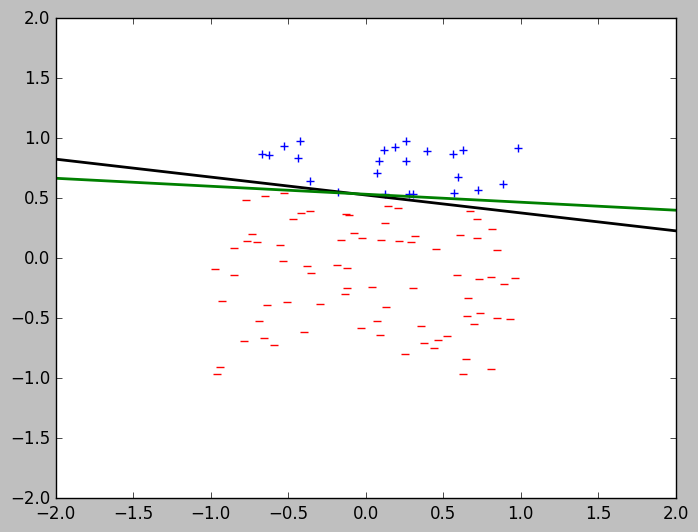

In [969]:
update_plot(points, labels, fx_vector, lr_vector)